# Classification of handwritten digits using MLN

# MNIST Dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" title="MNIST dataset" align="center"/>



# Problem
Classify handwritten digits from 0 - 9. <br>
Each image is 28x28 pixels

<img src="https://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" title="" align="center"/>


# Understanding the data

In [0]:
# MNIST data is present in the keras library. You may load it from there
from keras.datasets import mnist
def load_data():
    """
    Inputs:
        None
    Outputs:
        train_samples, train_labels, test_samples, test_labels: numpy arrays
    
    Load the train/test of mnist data into these variables
    """
    # YOUR CODE HERE
    (train_samples, train_labels), (test_samples, test_labels ) = mnist.load_data()
    return train_samples, train_labels, test_samples, test_labels 

train_samples, train_labels, test_samples, test_labels = load_data()

In [107]:
"""Test cases"""
assert train_samples.shape == (60000, 28, 28)
assert test_labels.shape == (10000,)
print('Test passed', '\U0001F44D')


Test passed 👍


### Shape of Data


In [108]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Range of Values

In [109]:
import numpy as np
np.amax(train_samples) # Max value

255

In [110]:
np.amin(train_samples) # Min Value

0

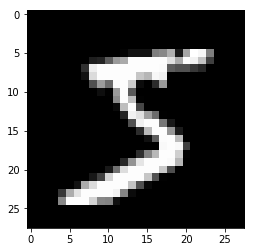

Label of image is 5


In [111]:
%matplotlib inline
import matplotlib.pyplot as plt

pixels = train_samples[0] # Shape (28, 28)
plt.imshow(pixels, cmap='gray')
plt.show()
print('Label of image is', train_labels[0])

# Data Preparation

### Normalize inputs to (0, 1)

In [0]:
def convert_dtype(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_float: numpy array, dtype of elements changed to 'float32'
    """
    # YOUR CODE HERE
    x_float = x.astype('float32')
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [113]:
"""Test cases"""
assert str(train_samples.dtype) == 'float32'
print('Test passed', '\U0001F44D')


Test passed 👍


In [0]:
def normalize(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_n: numpy array, elements normalized to be between (0, 1)
    """    
    # YOUR CODE HERE
    x_n=x/np.amax(x)
    return x_n
    
train_samples = normalize(train_samples)
test_samples = normalize(test_samples) 


In [115]:
"""Test cases"""
assert np.isclose(np.amax(train_samples), 1)
print('Test passed', '\U0001F44D')


Test passed 👍


In [0]:
def reshape(x):
    """
    We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras
    Inputs:
        x: numpy array of shape(samples, height, width)
    Outputs:
        x_r: numpy array of shape(samples, height, width, 1)
    """
    # YOUR CODE HERE
    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)

In [117]:
train_labels.shape

(60000,)

### Convert outputs to 1-hot vectors
\begin{equation*}
Eg: 5 \rightarrow [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
\end{equation*}

In [0]:
def oneHot(y, Ny):
    """
    Inputs:
        y: numpy array if shape (samples, ) with class labels
        Ny: number of classes
    Outputs:
        y_oh: numpy array of shape (samples, Ny) of one hot vectors
    """
    # YOUR CODE HERE
    from keras.utils import to_categorical
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

In [119]:
"""Test cases"""
assert train_labels.shape[1] == 10
print('Test passed', '\U0001F44D')


Test passed 👍


## Create a convolutional neural network model
You may design whatever cnn model you like. But following are hints to get started.<br>
Make the following layers:
1. cnn layer with kernel_size = (5, 5) and 32 kernels
2. cnn layer with kernel_size = (3, 3) and 20 kernels
3. Maxpooling layer of size (2, 2)
4. Flatten layer
5. Dense layer of appropriate size
6. Output layer of appropriate size

In [0]:
def create_model():
    """
    Inputs:
        None
    Outputs:
        model: compiled keras model
    """
    # YOUR CODE HERE
    from keras.models import Sequential
    from keras.layers import Dense, Flatten
    from keras.layers import Conv2D, MaxPooling2D
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=train_samples.shape[1:]))
    model.add(Conv2D(20, kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    return model

model = create_model()

In [121]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 20)        5780      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2420)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                77472     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 84,414
Trainable params: 84,414
Non-trainable params: 0
_________________________________________________________________


In [122]:
history = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=2, batch_size=200)
# Use 10% of samples for validation, validation_split is the relevant parameter


Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 3s 47us/step - loss: 0.3556 - acc: 0.8932 - val_loss: 0.0871 - val_acc: 0.9773
Epoch 2/2
54000/54000 [==============================] - 2s 33us/step - loss: 0.0844 - acc: 0.9748 - val_loss: 0.0664 - val_acc: 0.9822


In [0]:
def predict(x):
    """
    Inputs:
        x: input samples
        model: keras model
    Outputs:
        y: predicted labels
    """
    # YOUR CODE HERE
    y=model.predict(x)
    return y

In [0]:
def oneHot_tolabel(y):
    """
    Inputs:
        y: numpy array of shape (samples, Ny)
    Outputs:
        y_b: numpy array of shape (samples,) where one hot encoding is converted back to class labels
    """
    # YOUR CODE HERE
    y_b=y.argmax(1)
    return y_b
    

In [0]:
def create_confusion_matrix(true_labels, predicted_labels):
    """
    Inputs:
        true_labels: numpy array of shape (samples, ) with true_labels
        test_labels: numpy array of shape(samples, ) with test_labels
    Outputs:
        cm: numpy array of shape (Ny, Ny), confusion matrix. Ny -> number of unique classes in y
    """
    # YOUR CODE HERE
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(true_labels, predicted_labels)
    return cm

In [0]:
predicted_labels_train = predict(train_samples)

In [0]:
cm = create_confusion_matrix(oneHot_tolabel(train_labels), oneHot_tolabel(predict(train_samples)))

In [128]:
print(cm)

[[5882    7    9    4    2    2    6    3    8    0]
 [   1 6700   21    2    3    0    1   12    2    0]
 [   5   14 5877   10    8    1    3   20   20    0]
 [   5    8   36 6010    1   11    1   40   12    7]
 [   3   25    6    0 5766    0   14   10    7   11]
 [   7    6    9   59    3 5269   29    1   33    5]
 [  15   18    2    1    6    9 5862    0    5    0]
 [   2   12   32    5    9    2    0 6194    7    2]
 [  12   45   29   14    8   14   16   12 5691   10]
 [  34   15    6   26  106   16    5  152   40 5549]]


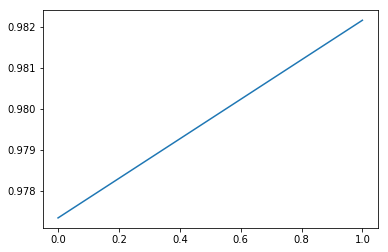

In [129]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'])
plt.show()

In [130]:
def accuracy(x_test, y_test, model):
    """
    Inputs:
        x_test: test samples
        y_test : test labels
        model: keras model
    Ouputs:
        acc: float, accuracy of test data on model
    """
    # YOUR CODE HERE
    loss,acc=model.evaluate(x_test, y_test)
    return acc

acc = accuracy(test_samples, test_labels, model)
print('Test accuracy is, ', acc*100, '%')

10000/10000 [==============================] - 1s 59us/step
Test accuracy is,  98.14 %


In [0]:
### Advanced
# 1. Tune the hyperparameters to better the performance
# 2. Find the classes which are getting most confused from confusion matrix. Take out those samples. Plot them and see why they are getting confused.

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=train_samples.shape[1:]))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=5, batch_size=200)
predicted_labels_train = predict(train_samples)
acc = accuracy(test_samples, test_labels, model)
print('Test accuracy is, ', acc*100, '%')

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 4s 66us/step - loss: 0.2074 - acc: 0.9396 - val_loss: 0.0638 - val_acc: 0.9827
Epoch 2/5
54000/54000 [==============================] - 3s 52us/step - loss: 0.0524 - acc: 0.9841 - val_loss: 0.0446 - val_acc: 0.9877
Epoch 3/5
54000/54000 [==============================] - 3s 52us/step - loss: 0.0352 - acc: 0.9887 - val_loss: 0.0487 - val_acc: 0.9867
Epoch 4/5
54000/54000 [==============================] - 3s 52us/step - loss: 0.0241 - acc: 0.9924 - val_loss: 0.0364 - val_acc: 0.9890
Epoch 5/5
10000/10000 [==============================] - 1s 54us/step
Test accuracy is,  98.92 %


In [155]:
wrong = list(np.nonzero(model.predict(test_samples).argmax(1) != test_labels.argmax(1)))[0]
type(wrong)

numpy.ndarray

[[ 975    0    2    1    0    0    1    0    0    1]
 [   0 1129    1    1    0    1    3    0    0    0]
 [   1    2 1025    0    1    0    0    3    0    0]
 [   0    0    3 1005    0    2    0    0    0    0]
 [   0    0    1    0  970    0    5    1    1    4]
 [   0    0    0   10    0  880    2    0    0    0]
 [   5    2    0    0    1    2  948    0    0    0]
 [   0    2    3    1    0    0    0 1020    1    1]
 [   3    0    4    2    1    2    1    3  954    4]
 [   0    2    0    2    7    6    0    5    1  986]]


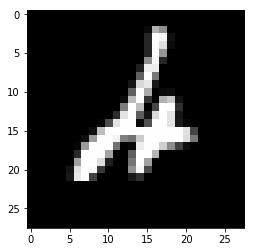

prediction of image is 6
label of image is 4


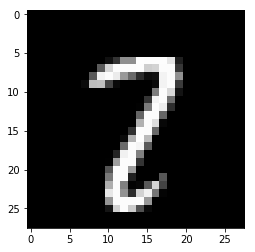

prediction of image is 7
label of image is 2


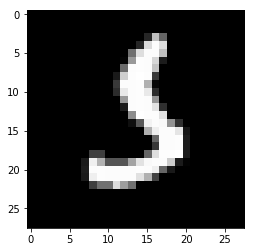

prediction of image is 3
label of image is 5


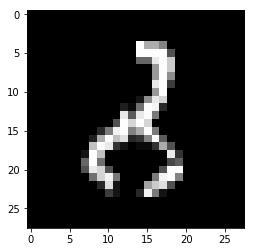

prediction of image is 2
label of image is 8


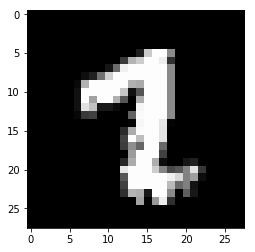

prediction of image is 1
label of image is 2


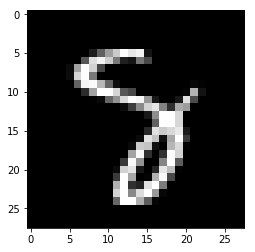

prediction of image is 7
label of image is 8


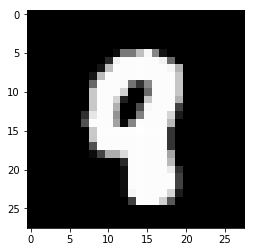

prediction of image is 9
label of image is 8


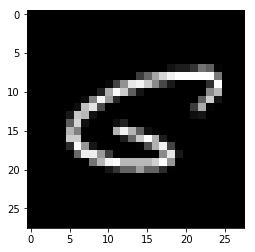

prediction of image is 5
label of image is 6


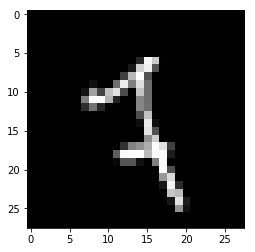

prediction of image is 3
label of image is 7


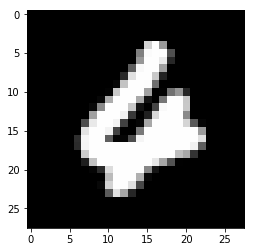

prediction of image is 6
label of image is 4


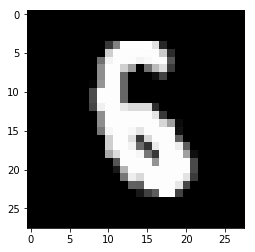

prediction of image is 5
label of image is 6


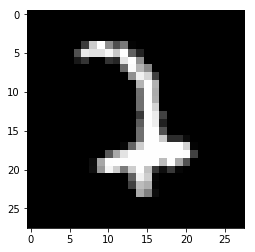

prediction of image is 2
label of image is 7


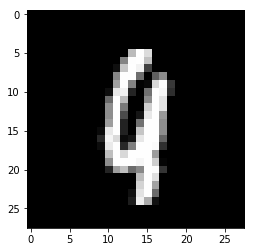

prediction of image is 4
label of image is 9


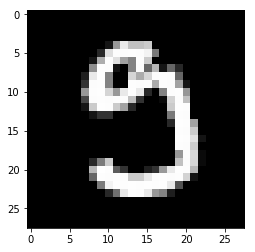

prediction of image is 5
label of image is 9


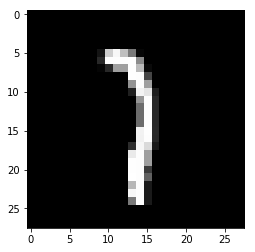

prediction of image is 1
label of image is 7


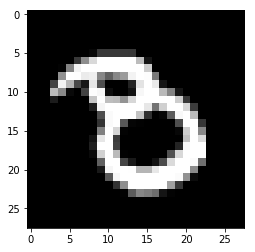

prediction of image is 0
label of image is 8


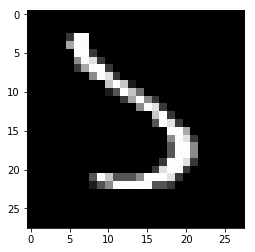

prediction of image is 3
label of image is 5


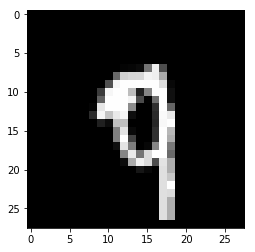

prediction of image is 7
label of image is 9


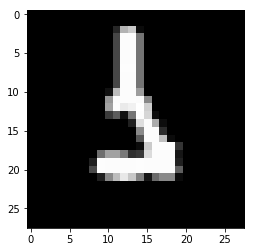

prediction of image is 5
label of image is 1


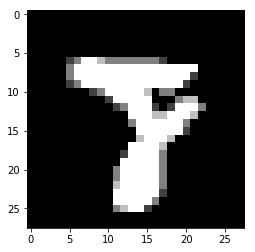

prediction of image is 7
label of image is 8


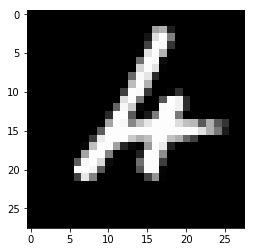

prediction of image is 6
label of image is 4


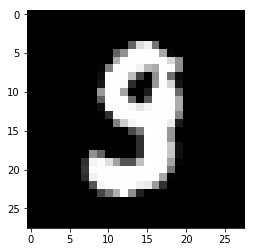

prediction of image is 5
label of image is 9


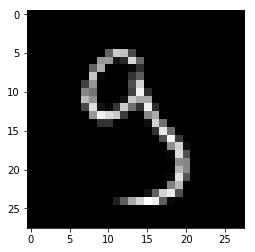

prediction of image is 5
label of image is 9


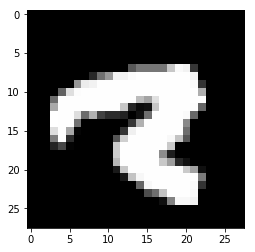

prediction of image is 7
label of image is 2


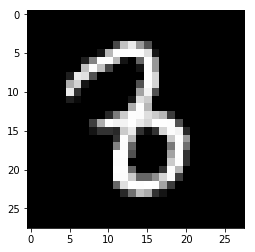

prediction of image is 3
label of image is 8


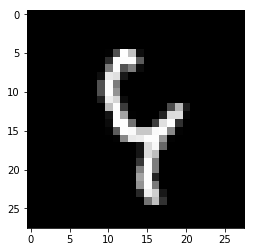

prediction of image is 4
label of image is 9


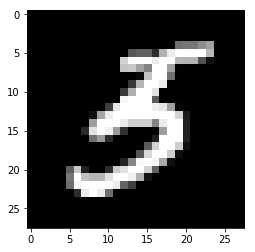

prediction of image is 3
label of image is 5


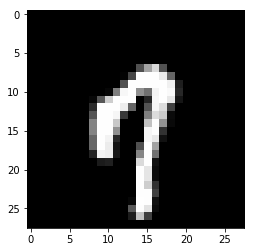

prediction of image is 9
label of image is 7


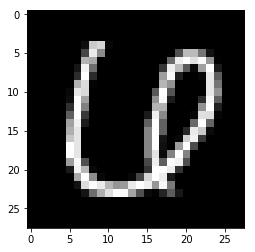

prediction of image is 0
label of image is 6


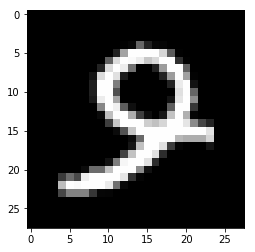

prediction of image is 8
label of image is 9


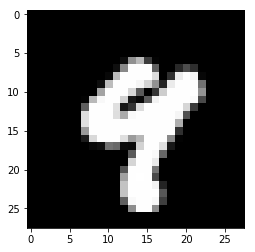

prediction of image is 9
label of image is 4


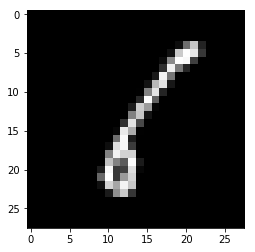

prediction of image is 1
label of image is 6


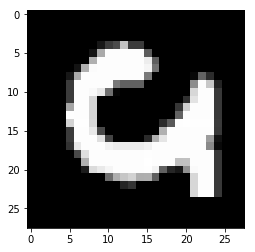

prediction of image is 4
label of image is 9


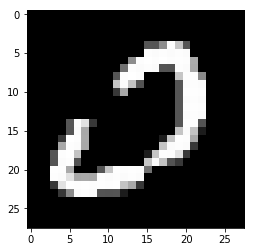

prediction of image is 2
label of image is 0


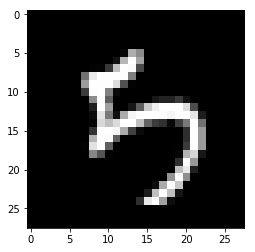

prediction of image is 3
label of image is 5


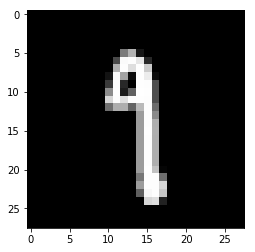

prediction of image is 1
label of image is 9


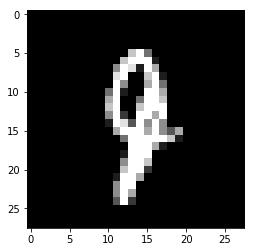

prediction of image is 4
label of image is 9


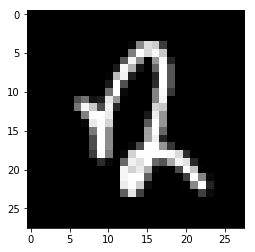

prediction of image is 4
label of image is 2


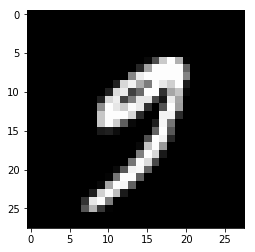

prediction of image is 7
label of image is 9


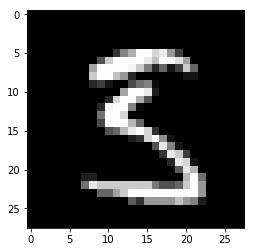

prediction of image is 3
label of image is 5


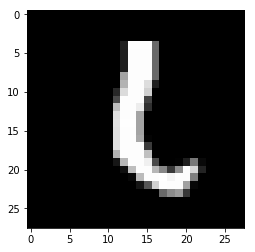

prediction of image is 1
label of image is 6


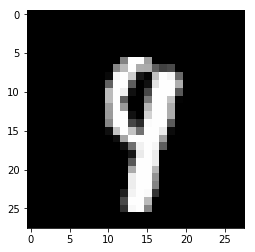

prediction of image is 4
label of image is 9


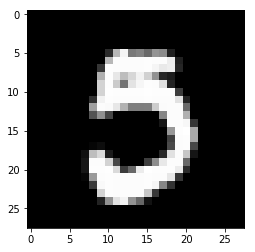

prediction of image is 3
label of image is 5


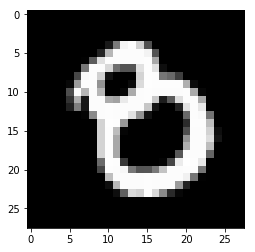

prediction of image is 0
label of image is 8


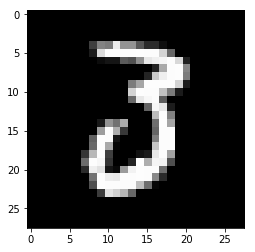

prediction of image is 2
label of image is 3


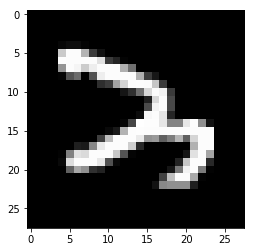

prediction of image is 2
label of image is 3


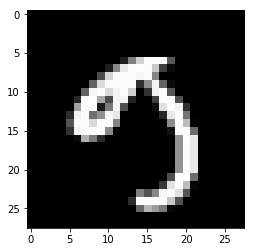

prediction of image is 3
label of image is 9


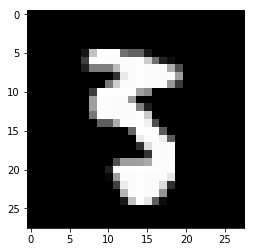

prediction of image is 5
label of image is 3


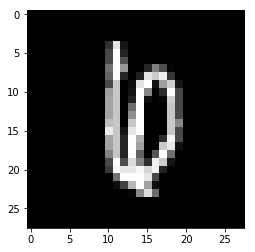

prediction of image is 0
label of image is 6


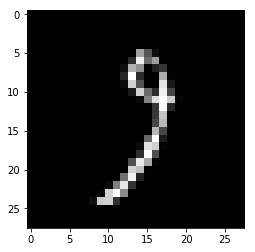

prediction of image is 5
label of image is 9


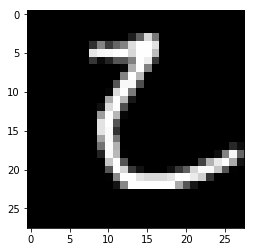

prediction of image is 0
label of image is 2


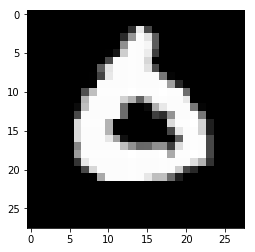

prediction of image is 0
label of image is 6


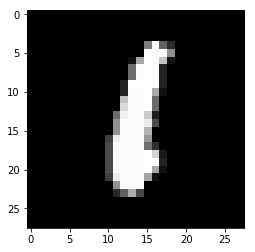

prediction of image is 6
label of image is 1


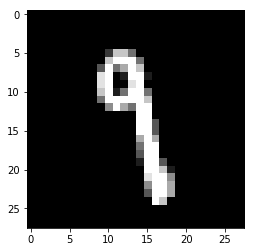

prediction of image is 1
label of image is 9


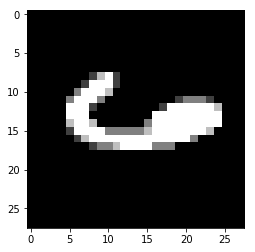

prediction of image is 4
label of image is 6


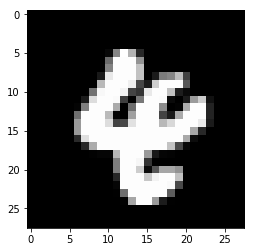

prediction of image is 8
label of image is 4


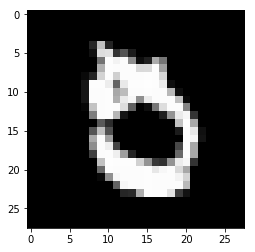

prediction of image is 3
label of image is 5


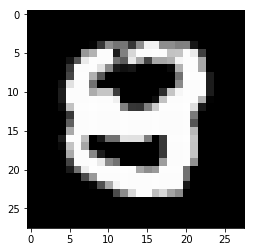

prediction of image is 9
label of image is 8


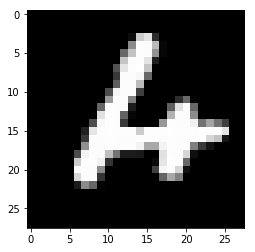

prediction of image is 6
label of image is 4


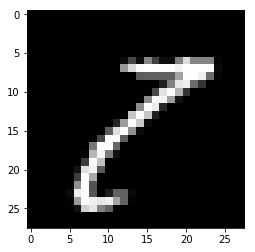

prediction of image is 8
label of image is 7


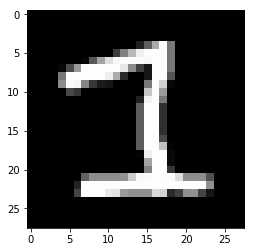

prediction of image is 3
label of image is 1


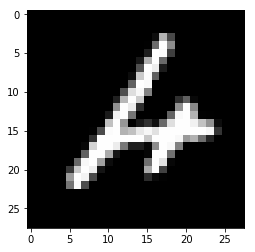

prediction of image is 6
label of image is 4


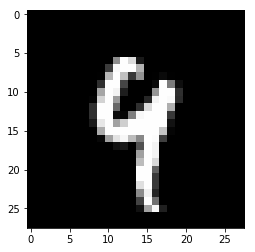

prediction of image is 4
label of image is 9


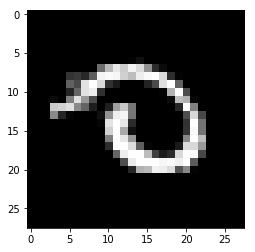

prediction of image is 2
label of image is 0


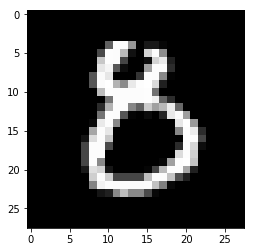

prediction of image is 0
label of image is 8


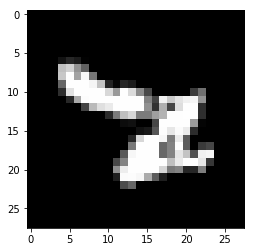

prediction of image is 7
label of image is 2


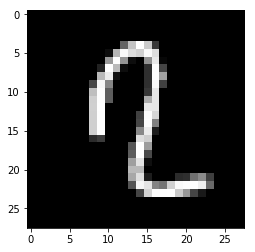

prediction of image is 1
label of image is 2


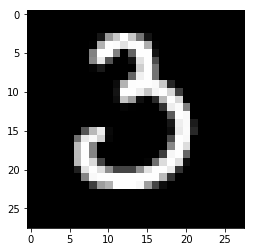

prediction of image is 2
label of image is 3


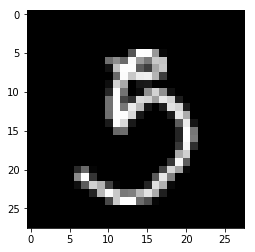

prediction of image is 3
label of image is 5


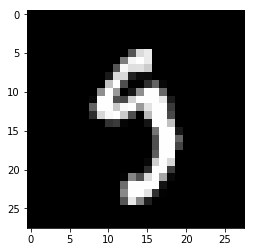

prediction of image is 3
label of image is 9


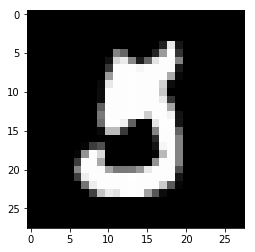

prediction of image is 3
label of image is 5


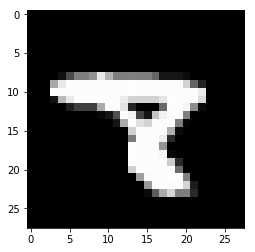

prediction of image is 7
label of image is 8


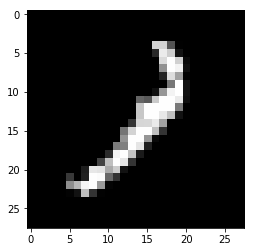

prediction of image is 2
label of image is 1


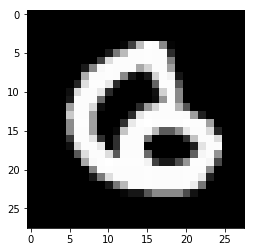

prediction of image is 0
label of image is 6


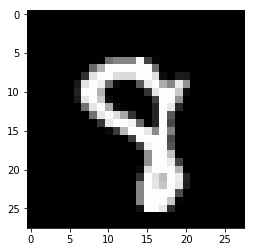

prediction of image is 9
label of image is 8


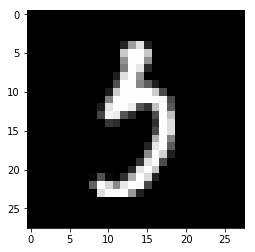

prediction of image is 5
label of image is 3


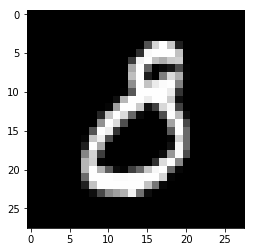

prediction of image is 3
label of image is 8


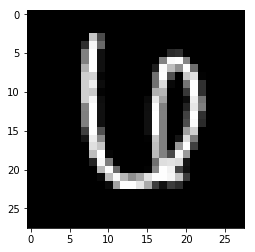

prediction of image is 0
label of image is 6


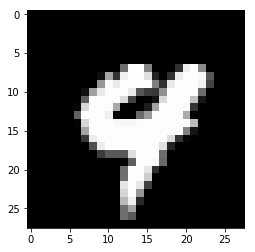

prediction of image is 9
label of image is 4


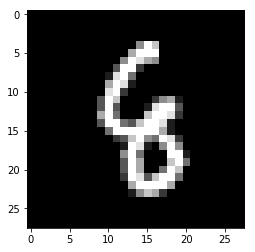

prediction of image is 6
label of image is 8


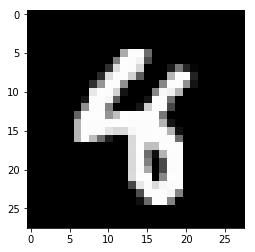

prediction of image is 4
label of image is 8


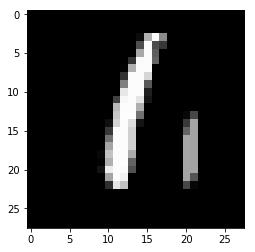

prediction of image is 6
label of image is 1


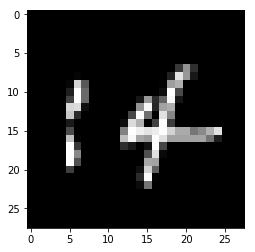

prediction of image is 2
label of image is 4


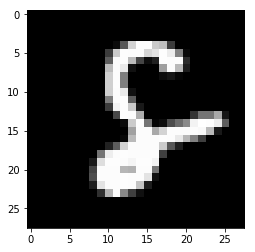

prediction of image is 5
label of image is 8


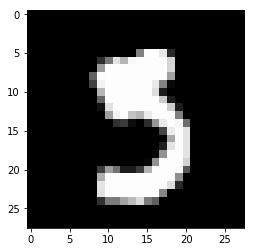

prediction of image is 3
label of image is 5


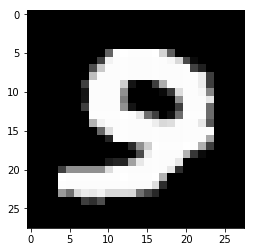

prediction of image is 5
label of image is 9


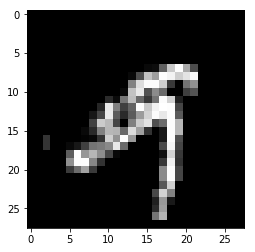

prediction of image is 5
label of image is 9


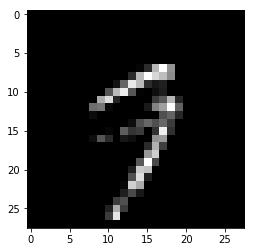

prediction of image is 7
label of image is 9


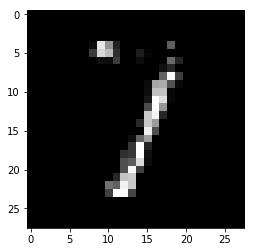

prediction of image is 1
label of image is 7


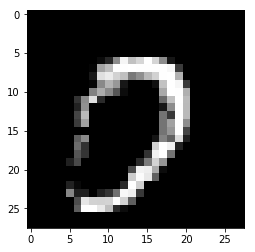

prediction of image is 3
label of image is 0


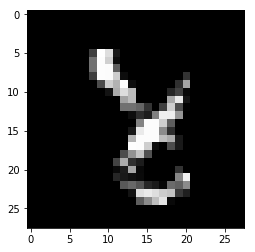

prediction of image is 2
label of image is 8


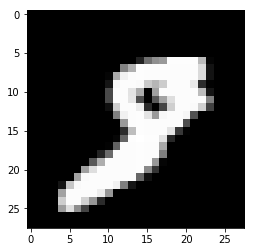

prediction of image is 9
label of image is 8


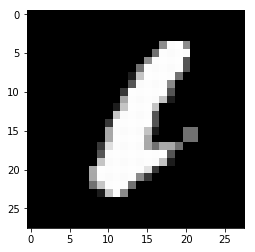

prediction of image is 6
label of image is 1


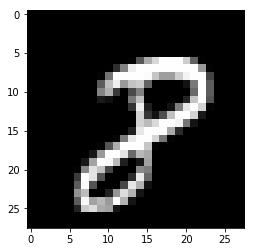

prediction of image is 2
label of image is 8


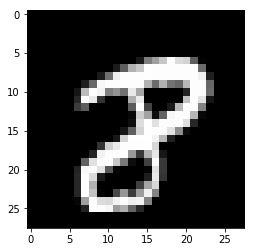

prediction of image is 2
label of image is 8


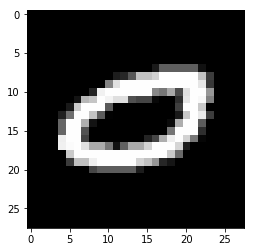

prediction of image is 9
label of image is 0


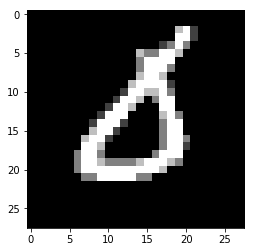

prediction of image is 6
label of image is 0


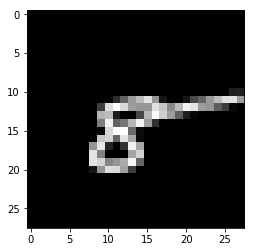

prediction of image is 5
label of image is 8


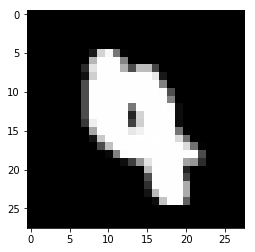

prediction of image is 9
label of image is 4


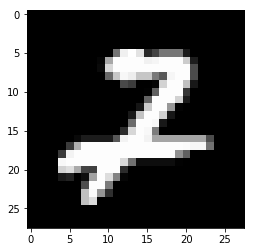

prediction of image is 2
label of image is 7


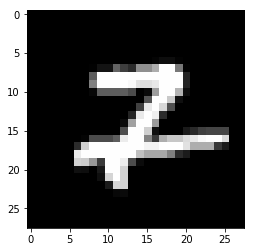

prediction of image is 2
label of image is 7


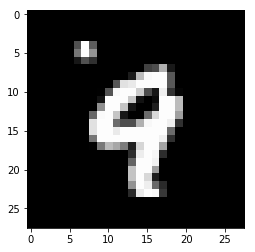

prediction of image is 4
label of image is 9


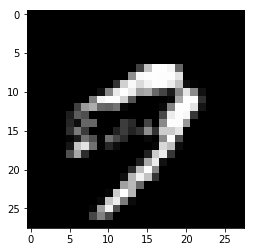

prediction of image is 7
label of image is 9


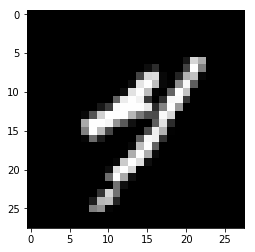

prediction of image is 7
label of image is 4


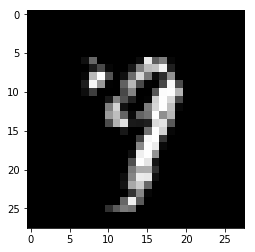

prediction of image is 7
label of image is 9


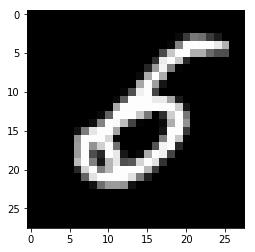

prediction of image is 6
label of image is 5


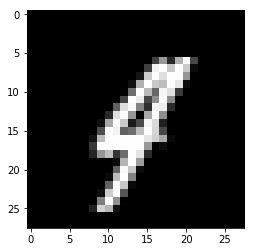

prediction of image is 9
label of image is 4


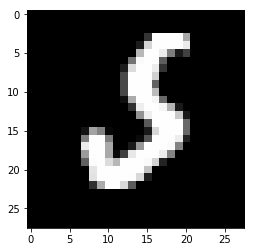

prediction of image is 6
label of image is 5


In [159]:
print(create_confusion_matrix(oneHot_tolabel(test_labels), oneHot_tolabel(predict(test_samples))))
y_prec=model.predict(test_samples)
def plot_img(i):
  %matplotlib inline
  import matplotlib.pyplot as plt
  x=test_samples[i]
#   print(i,x)
  x=x.reshape(28,28)
  pixels = x
  plt.imshow(pixels, cmap='gray')
  plt.show()
  print('prediction of image is',y_prec[i].argmax())
  print('label of image is',test_labels[i].argmax())
for i in wrong:
#   print(1)
  plot_img(i)